In [1]:
import numpy as np
import matplotlib.pyplot as plt

### (1) Mida el tiempo en funcion de N en el rango [100.000, 1.000.000].

Text(0.5, 1.0, 'Execution time v/s Input size in Reduction')

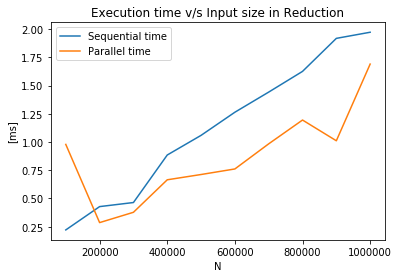

In [2]:
# running with 4 threads

# input size
n = np.array([1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 1e6])

#ms
seq_time = np.array([0.221382, 0.427991, 0.464072, 0.885119, 1.059300, 1.264280, 1.442686, 1.626161, 1.918757, 1.972984 ])

#ms
par_time = np.array([0.978996, 0.286226, 0.377529, 0.665529, 0.712359, 0.761549, 0.984223, 1.195031, 1.011366, 1.690881]) 

# Ploting results
plt.plot(n, seq_time, label= 'Sequential time')
plt.plot(n, par_time, label = 'Parallel time')
plt.legend()
plt.xlabel('N')
plt.ylabel('[ms]')
plt.title('Execution time v/s Input size in Reduction')


Se destaca que a mayor tamaño de input, se tiene mayor tiempo de ejecución para ambas implementaciones. Sin embargo, se observa que los tiempos de ejecución para la implementación paralela son menores que para la forma secuencial, lo que es esperable, ya que al paralelizar, la reduction ejecuta menor cantidad de operaciones.

### (2) Mida el speedup (speedup vs threads) con una curva en N=10^3 y otra en N=10^8.

Text(0.5, 1.0, 'Speedup v/s Threads in Reduction')

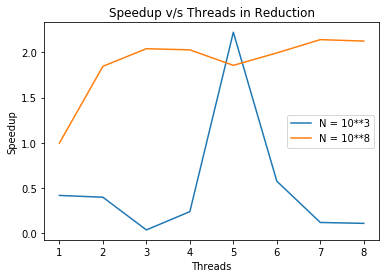

In [59]:
threads_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# ms
# N = 10**3
seq_time_1 = np.array([0.056307, 0.147570, 0.0329990, 0.13797, 0.295804, 0.222937, 0.131730, 0.107993])

# N = 10**8
seq_time_2 = np.array([177.840805, 178.315903, 176.716522, 180.194885, 181.149307, 178.828201, 181.448227, 177.426849])

# ms
# N = 10**3
par_time_1 = np.array([0.135251, 0.372485, 0.95817, 0.582224, 0.133085, 0.388376, 1.127591, 1.009177]) 

# N = 10**8
# For threads = 3, 5, 6, 7 it had error in compute reduction
# only with 1, 2, 4, 8 we dont get errors
# This work fine with threads equal to power of 2
par_time_2 = np.array([178.557297, 96.608170, 86.607971, 88.867882, 97.606232, 89.694275, 84.757385, 83.493690]) 

# speed up (seq time / parallel time)
speed_up_1 = seq_time_1/par_time_1

speed_up_2 = seq_time_2/par_time_2

# Plotting results
plt.plot(threads_1, speed_up_1, label = 'N = 10**3')
plt.plot(threads_1, speed_up_2, label = 'N = 10**8')
plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.legend()
plt.title('Speedup v/s Threads in Reduction')


Para el caso del speedup de N igual a 10**3, se tiene que su valor es mas irregular, ya que se tienen valores menores y mayores a 1 dentro del rango de threads analizados, observandose un máximo para 5 threads. Este comportamiento irregular puede deberse a que la implementación sequencial toma menor tiempo en ejecutarse, ya que el tamaño del input es lo suficientemente pequeño para que pueda ser ejecutado por el algoritmo secuencial.

Para el caso de N igual a 10**8, el speedup se mantiene siempre sobre 1, lo que significa que la implementación paralela toma menos tiempo que la sequencial. Su comportamineto regular demuestra que independiente del número de threads, siempre la paralela tomará menor tiempo. Cabe destacar que para threads que no son potencia de 2, el algoritmo no resuelve correctamente el problema.

Se destaca además la forma de la curva, la cual aumenta al aumentar el número de threads. Sin embargo, no se tiene una curva lineal.

### (3) Mida la eficiencia (efficiencia vs threads) con N en N=10^3 y otra en N=10^8.

Text(0.5, 1.0, 'Efficiency v/s Threads in Reduction')

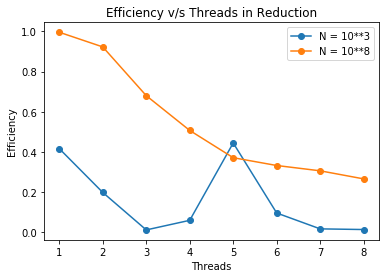

In [3]:
threads_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# ms
# N = 10**3
seq_time_1 = np.array([0.056307, 0.147570, 0.0329990, 0.13797, 0.295804, 0.222937, 0.131730, 0.107993])

# N = 10**8
seq_time_2 = np.array([177.840805, 178.315903, 176.716522, 180.194885, 181.149307, 178.828201, 181.448227, 177.426849])

# ms
# N = 10**3
par_time_1 = np.array([0.135251, 0.372485, 0.95817, 0.582224, 0.133085, 0.388376, 1.127591, 1.009177]) 

# N = 10**8
# For threads = 3, 5, 6, 7 it had error in compute reduction
# only with 1, 2, 4, 8 we dont get errors
# This work fine with threads equal to power of 2
par_time_2 = np.array([178.557297, 96.608170, 86.607971, 88.867882, 97.606232, 89.694275, 84.757385, 83.493690]) 

# speed up (seq time / parallel time)
efficiency_1 = (seq_time_1/par_time_1)/threads_1

efficiency_2 = (seq_time_2/par_time_2)/threads_1

# Plotting results
plt.plot(threads_1, efficiency_1, '-o', label = 'N = 10**3')
plt.plot(threads_1, efficiency_2, '-o', label = 'N = 10**8')
plt.xlabel('Threads')
plt.ylabel('Efficiency')
plt.legend()
plt.title('Efficiency v/s Threads in Reduction')

A mayor cantidad de threads la eficiencia disminuye. Para el caso en que N es igual a 10**8, se tiene que para 2 threads, se tiene una eficiencia cercana al 80 [%], luego, para 3 y 4 la eficiencia alcanza valores cercanos a 60[%] y 50 [%] respectivamente.

### (4) Investigue sobre la reduccion automatica y haga un ejemplo auto.c que la utilice. Compare resultados vs la implementacion manual.

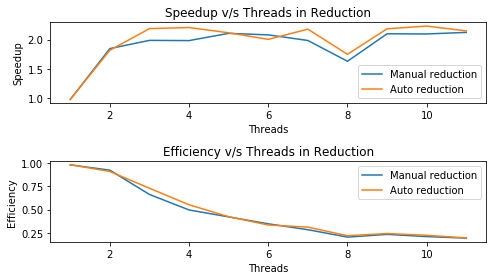

In [5]:
# N = 10**8
threads_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# ms
# N = 10**8
seq_time_manual = np.array([178.593918, 178.771317, 178.014160, 177.555969, 180.388763, 177.807617, 179.329529, 182.960022, 177.481857, 177.921051, 177.218796])
par_time_manual = np.array([182.206223, 96.792381, 89.605888, 89.537849, 85.650978, 85.483253, 90.351326, 112.152573, 84.560661, 84.899391, 83.485016 ])
par_time_auto = np.array([181.800400, 98.325394, 81.399765, 80.517273, 85.261543, 88.740166, 82.365829, 104.570740, 81.276108, 79.784988, 82.510826  ])

# speed up (seq time / parallel time)
speed_up_manual = seq_time_manual/par_time_manual
speed_up_auto = seq_time_manual/par_time_auto

# efficiency
efficiency_manual = speed_up_manual/threads_1
efficiency_auto = speed_up_auto/threads_1


# Plotting results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (7,4), tight_layout = True)


# plotting speedup
ax1.plot(threads_1, speed_up_manual, label = 'Manual reduction')
ax1.plot(threads_1, speed_up_auto, label = 'Auto reduction')

ax1.set_xlabel('Threads')
ax1.set_ylabel('Speedup')
ax1.legend()
ax1.title.set_text('Speedup v/s Threads in Reduction')

# plotting efficiency
ax2.plot(threads_1, efficiency_manual, label = 'Manual reduction')
ax2.plot(threads_1, efficiency_auto, label = 'Auto reduction')

ax2.set_xlabel('Threads')
ax2.set_ylabel('Efficiency')
ax2.legend()
ax2.title.set_text('Efficiency v/s Threads in Reduction')

Se comparan para N = 10**8, en donde se observa que ambas implementaciones tienen comportamientos similares, aunque se presentan diferencias para ciertos valores de threads, posiblemente debidos a las diferencias en los algoritmos.